# Objective

Extract all the mobile brands along with their models from [gadgetsnow](https://www.gadgetsnow.com/mobile-phones)

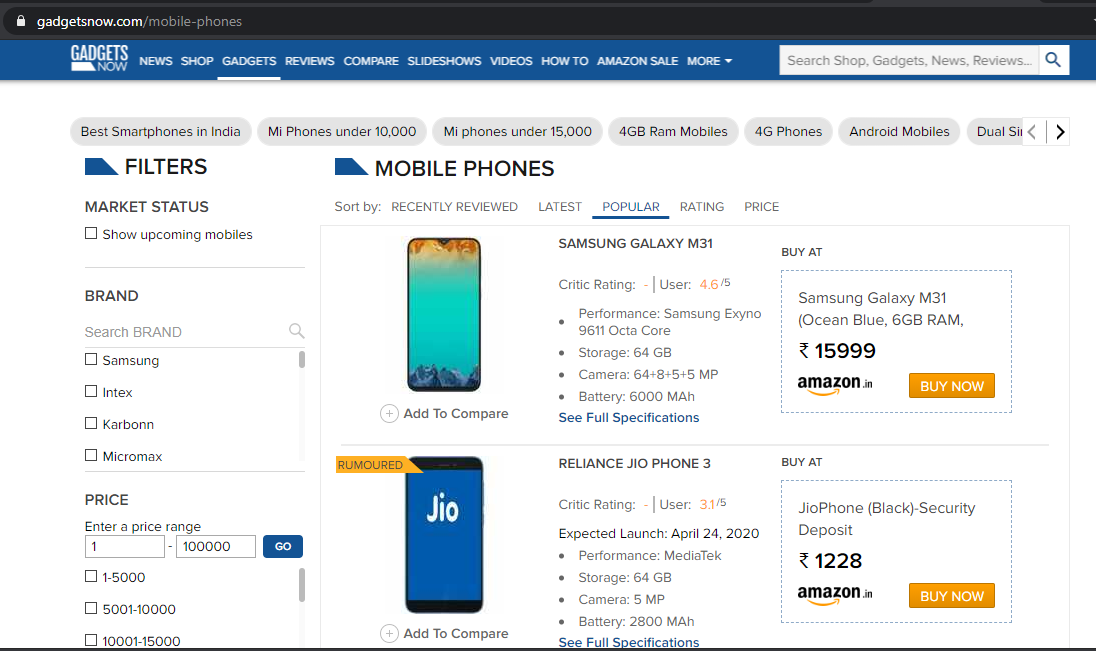

!pip install scrapy

!pip install selenium

[Download required driver for Chrome Browser 80.0.3987.149](https://chromedriver.storage.googleapis.com/index.html?path=80.0.3987.106/)

In [6]:
import re
import time
import pdb
import requests
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.webdriver import WebDriver

In [7]:
# Location where notebooks and chrome webdriver exists
project_dir = r'C:\Users\bharath.kancharla\Desktop\Notebooks\Web Scrapping\\'

In [8]:
def click_button(browser):
    try:
        # validate whether see more button visible or not
        display = browser.execute_script("return document.getElementsByClassName('more_btn')[0].style.display")
        if display == 'none':
            return False
        
        # find the see more button and click on it
        elem = browser.find_element_by_xpath('//*[@id="load_more"]')
        browser.execute_script('arguments[0].click();',elem)
        return True
    
    except Exception as e:
        print('Error occured while executing the click_button function: ' + str(e))
    return False

In [9]:
def selenium_scrapper(main_url):  #, brand_url=None
    brands_dict = {}
    
    driver1 = WebDriver(project_dir + 'chromedriver.exe')   # Handles main_url
    driver1.get(main_url)
    time.sleep(10)
#     while click_button(driver1):
#         print("Scrolling Further.....")
    
    brands_list_xpath = '//div[@class="filters"]//div[@class="filter_values"][2]/ul/li'
#     pdb.set_trace()
    elems = driver1.find_elements_by_xpath(brands_list_xpath)
    driver2 = WebDriver(project_dir + 'chromedriver.exe')   # Handles sub_url
    
    if elems:
        print("Number of Brands information available in GadgetsNow website: ", len(elems))
        print("Capturing the existing details of Mobile Brands in GadgetsNow Website")
        print("---------------------------------------------------------------------")
    else:
        print("No Brand Information is captured, Please check again...")
        
    for brand_index in range(len(elems)) :
        try:
            brand = driver1.find_element_by_xpath(brands_list_xpath+'[' + str(brand_index+1) + ']/a/label').text
            print("Capturing the models of Brand: ", brand)
            model_url = main_url + brand
            
            driver2.get(model_url)
            
            while click_button(driver2):
                print("Scrolling further....")
              
            sub_xpath = driver2.find_elements_by_xpath('//a[@class="img"]')
              
            print(f"Number of models in {brand} is {len(sub_xpath)}")
            
            brands_dict[brand] = []
            #Access models in a particular Brand
            for model_index in range(len(sub_xpath)):
                try:
                    model = driver2.find_element_by_xpath('//ul[@class="gadget_list"]/li[' +str(model_index+1)+']/a[@class="img"]/span[2]').text
                    model = model.replace(brand.upper(),'')  # Remove Brand name from the product name
                    #Applying regex to remove the common terms in the product name
                    model = re.sub("\d+GB\s{1,5}RAM|\d+\s{0,5}G|\s{0,5}LTE|\s{1,5}[2-6]G\s{1,5}|\s{1,5}VOLTE\s{1,5}|\s{0,5}CDMA|DUAL SIM|SINGLE SIM", 
                                   "",model).strip()
                    brands_dict[brand].append(model)
                except Exception as e:
                    print(str(e))
                    continue
            print(brands_dict)
        except Exception as e:
            print(str(e))
            continue
              
        brands_dict[brand] = list(dict.fromkeys(brands_dict[brand]))
        
    brands_dict = {k:v for k,v in brands_dict.items() if v}
    driver1.close()
    driver2.close()
    return brands_dict

In [10]:
brands_models = selenium_scrapper("https://www.gadgetsnow.com/mobile-phones/")

Number of Brands information available in GadgetsNow website:  300
Capturing the existing details of Mobile Brands in GadgetsNow Website
---------------------------------------------------------------------
Capturing the models of Brand:  Samsung
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrol

Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling further....
Scrolling 

KeyboardInterrupt: 

In [ ]:
brands_models